In [10]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Question
What differential pressures are generated across the heat exchanger ports at different fan power levels?
# Setup
* Fan F001 connected through hose to cold side intake port
  * i.e. Room -> F001 -> hose -> SENS2_PRESS -> SENS1_PRESS -> Room
* Fan F002 connected through heater and hose to hot side intake port
  * i.e. Room -> F002 -> hose -> heater -> hose -> SENS0_PRESS -> SENS3_PRESS -> Room
* No tubes on output ports, but a cardboard baffle cross both of them around 55 degrees to direct air away fron intakes
# Methodology
* For each fan power level,
* Set both fans to power level
* Wait at least 20s, and at most 40s for readings to stabilize within 0.1%
* Measure absolute pressures at each port of the heat exchanger
* Record average over a 10s sampling interval
# Calibration
* Delta calculation will naturally remove any ambient changes
* Use first data reading (with fans off) to get an offset for 0 delta pressure and apply to all future readings

In [146]:
def read_heat_exchanger_fanspeed_pressure_csv(csv_file_name):
    data = pd.read_csv(csv_file_name)
    data["DP0"] = data["SENS0_PRESS"] - data["SENS3_PRESS"]
    data["DP1"] = data["SENS2_PRESS"] - data["SENS1_PRESS"]
    dp0_offset = 0 - data["DP0"][0]
    dp1_offset = 0 - data["DP1"][0]
    data["DP0_CALIB"] = data["DP0"] + dp0_offset
    data["DP1_CALIB"] = data["DP1"] + dp1_offset
    return data

# 2024-09-19-heat-exchanger-fanspeed-pressure-1.csv
* Took the heat exchanger setup from Mike's house
* Connected existing I2C sensor harness to new test controller
* Connected heater to new test controller

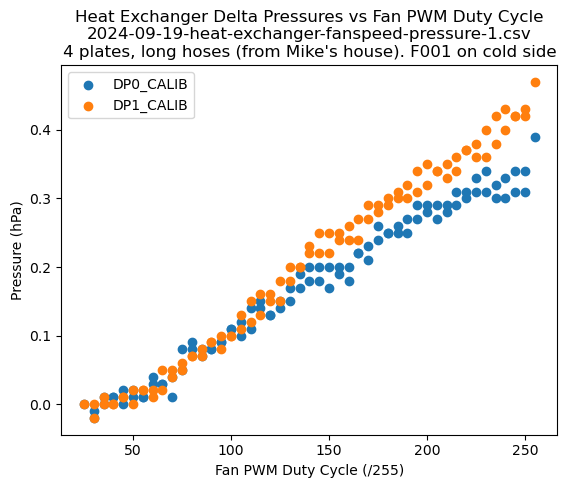

In [14]:
data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-19-heat-exchanger-fanspeed-pressure-1.csv")
plt.title('''Heat Exchanger Delta Pressures vs Fan PWM Duty Cycle
2024-09-19-heat-exchanger-fanspeed-pressure-1.csv
4 plates, long hoses (from Mike's house). F001 on cold side''')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Fan PWM Duty Cycle (/255)')
plt.scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0_CALIB")
plt.scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1_CALIB")
plt.legend()
plt.show()

# 2024-09-23-test_fan_step_pwm_pressure-1.csv
* Moved experiment setup downstairs
* Changed step size to 2, and updated code to do intermediates on the way down e.g. on way up 2, 4, 6, etc.  on way down 5, 3, etc.
* Repeated same experiment as above

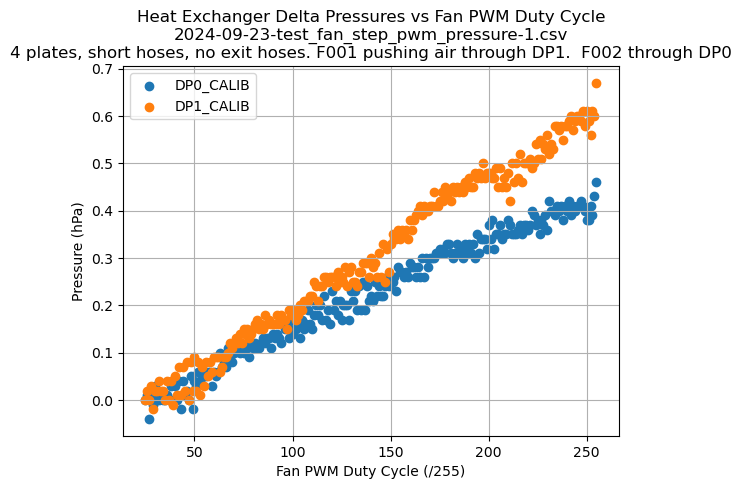

In [16]:
data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-23-test_fan_step_pwm_pressure-1.csv")
plt.title('''Heat Exchanger Delta Pressures vs Fan PWM Duty Cycle
2024-09-23-test_fan_step_pwm_pressure-1.csv
4 plates, short hoses, no exit hoses. F001 pushing air through DP1.  F002 through DP0''')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Fan PWM Duty Cycle (/255)')
plt.scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0_CALIB")
plt.scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1_CALIB")
plt.grid()
plt.legend()
plt.show()

# 2024-09-23-test_fan_step_pwm_pressure-2.csv
* Labelled fans as F001 and F002 with physical labels.  Naming convention is first letter F for fan, and a sequence number
* Swapped fans: F002 on cold side input (T2), F001 on hot side input (T0)
* Reran same test as above

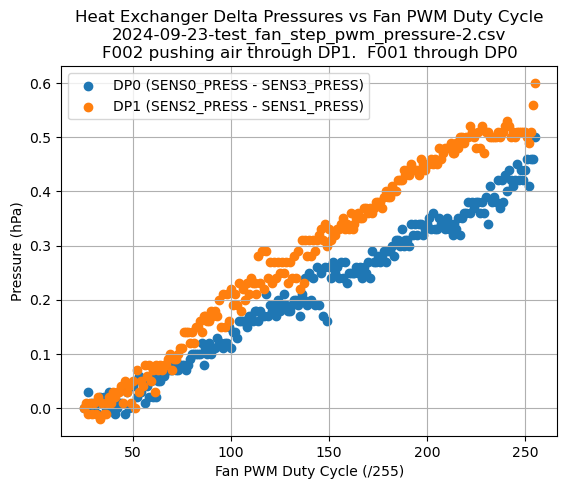

In [18]:
data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-23-test_fan_step_pwm_pressure-2.csv")
plt.title('''Heat Exchanger Delta Pressures vs Fan PWM Duty Cycle
2024-09-23-test_fan_step_pwm_pressure-2.csv
F002 pushing air through DP1.  F001 through DP0''')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Fan PWM Duty Cycle (/255)')
plt.scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0 (SENS0_PRESS - SENS3_PRESS)")
plt.scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1 (SENS2_PRESS - SENS1_PRESS)")
plt.grid()
plt.legend()
plt.show()

# 2024-09-24-test_fan_step_pwm_pressure-1.log

* DP_1 = SENS2_PRESS - SENS1_PRESS
  * where F002 -> hose -> SENS2_PRESS -> SENS1_PRESS
* DP_0 = SENS0_PRESS - SENS3_PRESS
  * where F001 -> hose -> heater -> hose -> SENS0_PRESS -> SENS3_PRESS
* F002 plugged into controller port D9 (middle terminals)
* F001 plugged into controller port D10 (outer terminals)
* Note: No difference from last test

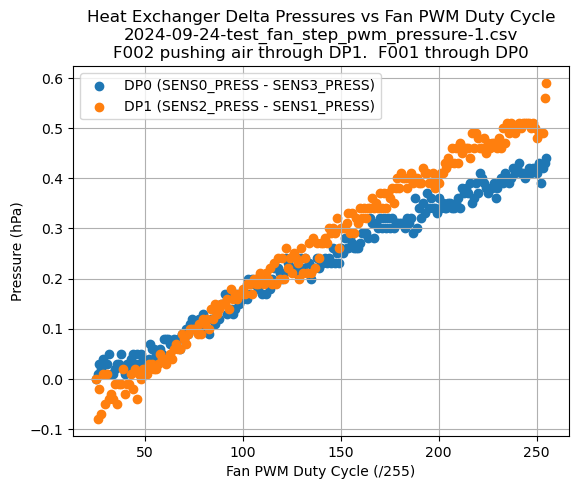

In [20]:
data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-24-test_fan_step_pwm_pressure-1.csv")
plt.title('''Heat Exchanger Delta Pressures vs Fan PWM Duty Cycle
2024-09-24-test_fan_step_pwm_pressure-1.csv
F002 pushing air through DP1.  F001 through DP0''')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Fan PWM Duty Cycle (/255)')
plt.scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0 (SENS0_PRESS - SENS3_PRESS)")
plt.scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1 (SENS2_PRESS - SENS1_PRESS)")
plt.grid()
plt.legend()
plt.show()

# 2024-09-24-test_fan_step_pwm_pressure-2.log

* DP_1 = F002 -> hose -> T2 -> T1
* DP_0 = F001 -> hose -> heater -> hose -> T0 -> T3
* F001 plugged into controller port D9 (middle terminals)
* F002 plugged into controller port D10 (outer terminals)
* Note: F001 and F002 controller connections switched from previous test

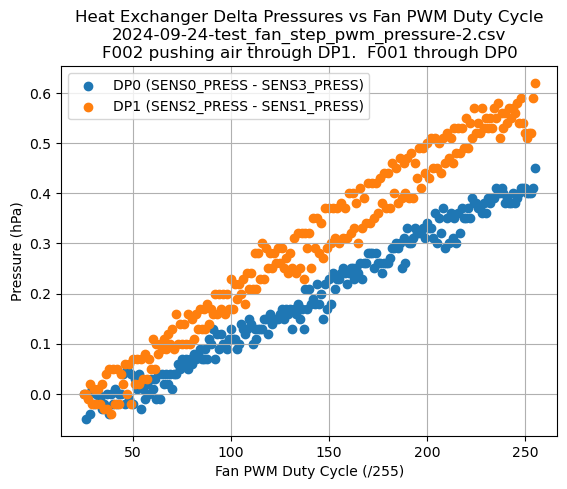

In [22]:
data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-24-test_fan_step_pwm_pressure-2.csv")
plt.title('''Heat Exchanger Delta Pressures vs Fan PWM Duty Cycle
2024-09-24-test_fan_step_pwm_pressure-2.csv
F002 pushing air through DP1.  F001 through DP0''')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Fan PWM Duty Cycle (/255)')
plt.scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0 (SENS0_PRESS - SENS3_PRESS)")
plt.scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1 (SENS2_PRESS - SENS1_PRESS)")
plt.grid()
plt.legend()
plt.show()

DP1 appears to have drifted between the run up and back down.  Ignore it

# 2024-09-24-test_fan_step_pwm_pressure-3.csv

What if we compare DP0 on each MOSFET?

Re-run the new MOSFET positions because of the drift and compare to the original run today, 2024-09-24-test_fan_step_pwm_pressure-1.csv

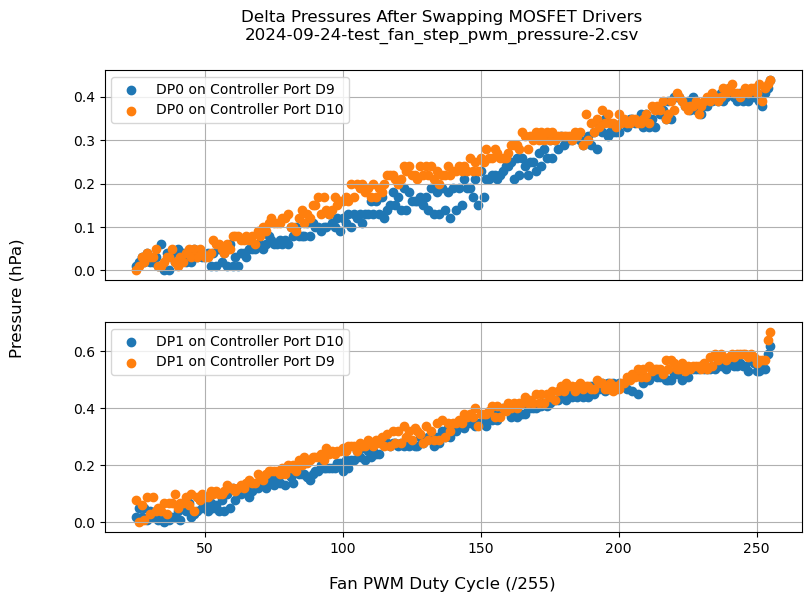

In [136]:
data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-24-test_fan_step_pwm_pressure-3.csv")
data2 = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-24-test_fan_step_pwm_pressure-1.csv")

fig,ax = plt.subplots(2, figsize=(9,6))
fig.suptitle('''Delta Pressures After Swapping MOSFET Drivers
2024-09-24-test_fan_step_pwm_pressure-2.csv''')

fig.supxlabel("Fan PWM Duty Cycle (/255)")
fig.supylabel("Pressure (hPa)")

ax[0].scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0 on Controller Port D9")
ax[0].scatter(y=data2["DP0_CALIB"], x=data["FAN0"], label="DP0 on Controller Port D10")
ax[0].set(xticklabels=[])
ax[0].tick_params(bottom=False)
ax[0].legend()
ax[0].grid()

ax[1].scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1 on Controller Port D10")
ax[1].scatter(y=data2["DP1_CALIB"], x=data["FAN0"], label="DP1 on Controller Port D9")
ax[1].legend()
ax[1].grid()

F001 DP0 0.0018805175334411551 -0.03270968411900503
F001 DP1 0.0027237971923129633 -0.058690914283070855
F002 DP0 0.0019208512626802431 -0.006927834783928068
F002 DP1 0.002556504215424855 -0.016525308774262303
SENS0_PRESS 980.62 981.51 -0.8899999999999864
SENS1_PRESS 993.89 994.42 -0.5299999999999727
SENS2_PRESS 989.27 990.28 -1.009999999999991
SENS3_PRESS 985.23 985.77 -0.5399999999999636


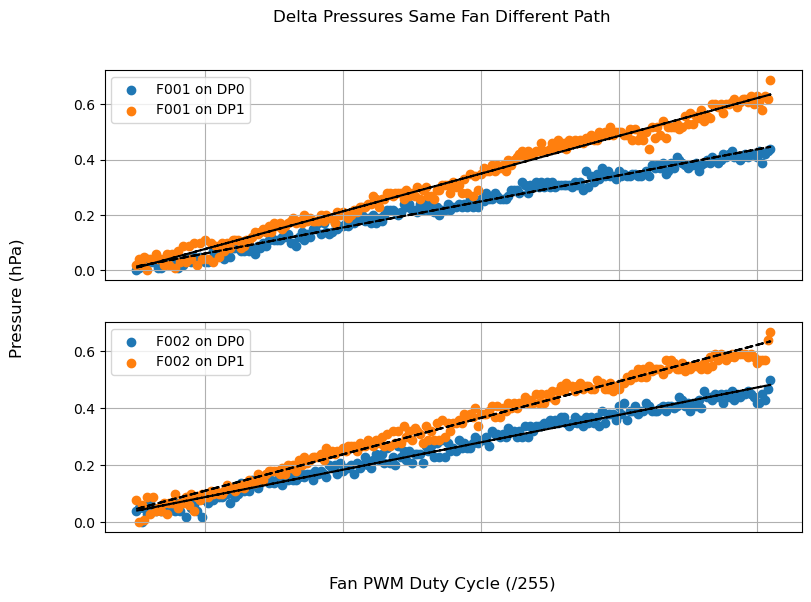

In [134]:
import numpy as np

f001_through_dp0 = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-24-test_fan_step_pwm_pressure-1.csv") # f001 through dp0
f001_through_dp1 = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-23-test_fan_step_pwm_pressure-1.csv") # f001 through dp1

fig,ax = plt.subplots(2, figsize=(9,6))
fig.suptitle('''Delta Pressures Same Fan Different Path
''')

fig.supxlabel("Fan PWM Duty Cycle (/255)")
fig.supylabel("Pressure (hPa)")

ax[0].scatter(y=f001_through_dp0["DP0_CALIB"], x=f001_through_dp0["FAN0"], label="F001 on DP0")
ax[0].scatter(y=f001_through_dp1["DP1_CALIB"], x=f001_through_dp1["FAN0"], label="F001 on DP1")
ax[0].set(xticklabels=[])
ax[0].tick_params(bottom=False)
ax[0].legend()
ax[0].grid()

m, b = np.polyfit(f001_through_dp0["FAN0"], f001_through_dp0["DP0_CALIB"], 1)
print("F001 DP0", m, b)
ax[0].plot(data["FAN0"], m*f001_through_dp0["FAN0"]+b, '--k')

m, b = np.polyfit(f001_through_dp1["FAN0"], f001_through_dp1["DP1_CALIB"], 1)
print("F001 DP1", m, b)
ax[0].plot(data["FAN0"], m*f001_through_dp1["FAN0"]+b, '--k')

ax[1].scatter(y=f001_through_dp1["DP0_CALIB"], x=f001_through_dp1["FAN0"], label="F002 on DP0")
ax[1].scatter(y=f001_through_dp0["DP1_CALIB"], x=f001_through_dp0["FAN0"], label="F002 on DP1")
ax[1].set(xticklabels=[])
ax[1].tick_params(bottom=False)
ax[1].legend()
ax[1].grid()

m, b = np.polyfit(f001_through_dp1["FAN0"], f001_through_dp1["DP0_CALIB"], 1)
print("F002 DP0", m, b)
ax[1].plot(data["FAN0"], m*f001_through_dp1["FAN0"]+b, '--k')

m, b = np.polyfit(f001_through_dp0["FAN0"], f001_through_dp0["DP1_CALIB"], 1)
print("F002 DP1", m, b)
ax[1].plot(data["FAN0"], m*f001_through_dp0["FAN0"]+b, '--k')


print("SENS0_PRESS", f001_through_dp0["SENS0_PRESS"].min(), f001_through_dp0["SENS0_PRESS"].max(), f001_through_dp0["SENS0_PRESS"].min()- f001_through_dp0["SENS0_PRESS"].max())
print("SENS1_PRESS", f001_through_dp0["SENS1_PRESS"].min(), f001_through_dp0["SENS1_PRESS"].max(), f001_through_dp0["SENS1_PRESS"].min()- f001_through_dp0["SENS1_PRESS"].max())
print("SENS2_PRESS", f001_through_dp0["SENS2_PRESS"].min(), f001_through_dp0["SENS2_PRESS"].max(), f001_through_dp0["SENS2_PRESS"].min()- f001_through_dp0["SENS2_PRESS"].max())
print("SENS3_PRESS", f001_through_dp0["SENS3_PRESS"].min(), f001_through_dp0["SENS3_PRESS"].max(), f001_through_dp0["SENS3_PRESS"].min()- f001_through_dp0["SENS3_PRESS"].max())

SENS0_PRESS 980.96 982.19 -1.2300000000000182
SENS1_PRESS 994.78 995.64 -0.8600000000000136
SENS2_PRESS 989.75 991.01 -1.259999999999991
SENS3_PRESS 985.12 986.03 -0.9099999999999682


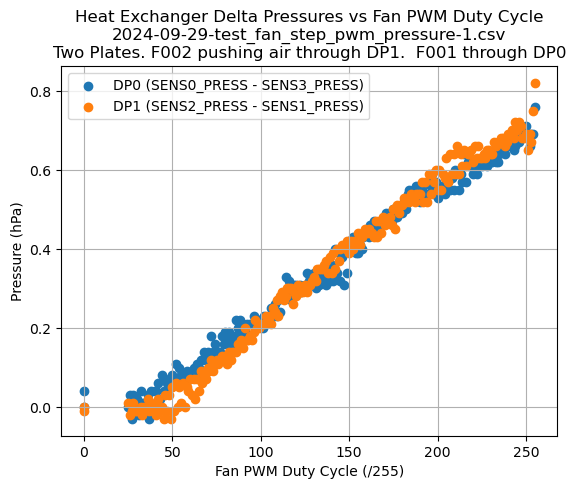

In [148]:
import numpy as np

data = read_heat_exchanger_fanspeed_pressure_csv("data/2024-09-29-test_fan_step_pwm_pressure-1.csv") # f001 through dp0

print("SENS0_PRESS", data["SENS0_PRESS"].min(), data["SENS0_PRESS"].max(), data["SENS0_PRESS"].min()- data["SENS0_PRESS"].max())
print("SENS1_PRESS", data["SENS1_PRESS"].min(), data["SENS1_PRESS"].max(), data["SENS1_PRESS"].min()- data["SENS1_PRESS"].max())
print("SENS2_PRESS", data["SENS2_PRESS"].min(), data["SENS2_PRESS"].max(), data["SENS2_PRESS"].min()- data["SENS2_PRESS"].max())
print("SENS3_PRESS", data["SENS3_PRESS"].min(), data["SENS3_PRESS"].max(), data["SENS3_PRESS"].min()- data["SENS3_PRESS"].max())

plt.title('''Heat Exchanger Delta Pressures vs Fan PWM Duty Cycle
2024-09-29-test_fan_step_pwm_pressure-1.csv
Two Plates. F002 pushing air through DP1.  F001 through DP0''')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Fan PWM Duty Cycle (/255)')
plt.scatter(y=data["DP0_CALIB"], x=data["FAN0"], label="DP0 (SENS0_PRESS - SENS3_PRESS)")
plt.scatter(y=data["DP1_CALIB"], x=data["FAN0"], label="DP1 (SENS2_PRESS - SENS1_PRESS)")
plt.grid()
plt.legend()
plt.show()